In [2]:
import pandas as pd
import glob

In [3]:
path = r"../raw/api_data_aadhar_biometric_*.csv"
files = glob.glob(path)

print("Files found:")
for f in files:
    print(f)


Files found:
../raw\api_data_aadhar_biometric_0_500000.csv
../raw\api_data_aadhar_biometric_1000000_1500000.csv
../raw\api_data_aadhar_biometric_1500000_1861108.csv
../raw\api_data_aadhar_biometric_500000_1000000.csv


In [4]:
df = pd.concat(
    (pd.read_csv(f, dtype=str) for f in files),
    ignore_index=True
)

In [5]:
df.shape
df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1861108 entries, 0 to 1861107
Data columns (total 6 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   date          object
 1   state         object
 2   district      object
 3   pincode       object
 4   bio_age_5_17  object
 5   bio_age_17_   object
dtypes: object(6)
memory usage: 85.2+ MB


In [6]:
df.columns

Index(['date', 'state', 'district', 'pincode', 'bio_age_5_17', 'bio_age_17_'], dtype='object')

In [7]:
df['state_raw'] = df['state']
df['date_raw'] = df['date']

In [8]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)


In [9]:
df['state'] = (
    df['state']
    .astype(str)
    .str.strip()
    .str.title()
)

df['district'] = (
    df['district']
    .astype(str)
    .str.strip()
    .str.title()
)


In [10]:
df['state'].nunique()


50

In [11]:
sorted(df['state'].unique())


['Andaman & Nicobar Islands',
 'Andaman And Nicobar Islands',
 'Andhra Pradesh',
 'Arunachal Pradesh',
 'Assam',
 'Bihar',
 'Chandigarh',
 'Chhatisgarh',
 'Chhattisgarh',
 'Dadra & Nagar Haveli',
 'Dadra And Nagar Haveli',
 'Dadra And Nagar Haveli And Daman And Diu',
 'Daman & Diu',
 'Daman And Diu',
 'Delhi',
 'Goa',
 'Gujarat',
 'Haryana',
 'Himachal Pradesh',
 'Jammu & Kashmir',
 'Jammu And Kashmir',
 'Jharkhand',
 'Karnataka',
 'Kerala',
 'Ladakh',
 'Lakshadweep',
 'Madhya Pradesh',
 'Maharashtra',
 'Manipur',
 'Meghalaya',
 'Mizoram',
 'Nagaland',
 'Odisha',
 'Orissa',
 'Pondicherry',
 'Puducherry',
 'Punjab',
 'Rajasthan',
 'Sikkim',
 'Tamil Nadu',
 'Tamilnadu',
 'Telangana',
 'Tripura',
 'Uttar Pradesh',
 'Uttarakhand',
 'Uttaranchal',
 'West  Bengal',
 'West Bangal',
 'West Bengal',
 'Westbengal']

In [12]:
state_mapping = {
    'Andaman & Nicobar Islands': 'Andaman And Nicobar Islands',

    'Chhatisgarh': 'Chhattisgarh',

    'Orissa': 'Odisha',

    'Tamilnadu': 'Tamil Nadu',

    'Uttaranchal': 'Uttarakhand',

    'West Bangal': 'West Bengal',
    'West Bengli': 'West Bengal',
    'Westbengal': 'West Bengal',
    'West  Bengal': 'West Bengal',

    'Pondicherry': 'Puducherry',

    'Dadra & Nagar Haveli': 'Dadra And Nagar Haveli And Daman And Diu',
    'Daman & Diu': 'Dadra And Nagar Haveli And Daman And Diu',
    'Dadra And Nagar Haveli': 'Dadra And Nagar Haveli And Daman And Diu',

    'Jammu & Kashmir': 'Jammu And Kashmir'
}

df['state'] = df['state'].replace(state_mapping)


In [13]:
valid_states = [
    'Andaman And Nicobar Islands','Andhra Pradesh','Arunachal Pradesh','Assam',
    'Bihar','Chandigarh','Chhattisgarh','Delhi','Goa','Gujarat','Haryana',
    'Himachal Pradesh','Jammu And Kashmir','Jharkhand','Karnataka','Kerala',
    'Ladakh','Lakshadweep','Madhya Pradesh','Maharashtra','Manipur','Meghalaya',
    'Mizoram','Nagaland','Odisha','Puducherry','Punjab','Rajasthan','Sikkim',
    'Tamil Nadu','Telangana','Tripura','Uttar Pradesh','Uttarakhand','West Bengal',
    'Dadra And Nagar Haveli And Daman And Diu'
]

df = df[df['state'].isin(valid_states)]


In [14]:
sorted(df['state'].unique())
df['state'].nunique()


36

### The biometric dataset contained multiple textual variants and legacy names for states. A consistent normalization and validation approach was applied to align state identifiers across enrolment, demographic, and biometric datasets.

In [15]:
df['district'] = (
    df['district']
    .astype(str)
    .str.strip()
    .str.title()
)

In [16]:
df['pincode'] = pd.to_numeric(df['pincode'], errors='coerce')
df = df[df['pincode'].between(100000, 999999)]


In [19]:
df['bio_age_5_17'] = pd.to_numeric(
    df['bio_age_5_17'], errors='coerce'
)

df['bio_age_17_'] = pd.to_numeric(
    df['bio_age_17_'], errors='coerce'
)


In [20]:
df[['bio_age_5_17','bio_age_17_']] = df[
    ['bio_age_5_17','bio_age_17_']
].fillna(0)


In [21]:
df['total_bio_attempts'] = (
    df['bio_age_5_17'] +
    df['bio_age_17_']
)


In [22]:
df[['bio_age_5_17','bio_age_17_','total_bio_attempts']].dtypes


bio_age_5_17          int64
bio_age_17_           int64
total_bio_attempts    int64
dtype: object

In [23]:
df['date'] = pd.to_datetime(
    df['date'], errors='coerce', dayfirst=True
)


In [24]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)


In [25]:
df.isna().sum()


date                  0
state                 0
district              0
pincode               0
bio_age_5_17          0
bio_age_17_           0
state_raw             0
date_raw              0
total_bio_attempts    0
dtype: int64

In [27]:
df['district'] = (
    df['district']
    .astype(str)
    .str.strip()
    .str.title()
)


In [28]:
df['pincode'] = pd.to_numeric(df['pincode'], errors='coerce')
df = df[df['pincode'].between(100000, 999999)]


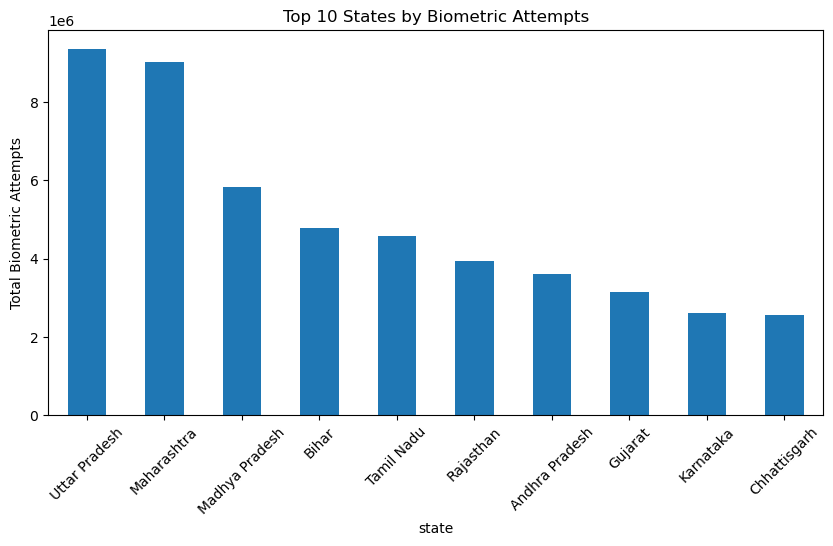

In [29]:
import matplotlib.pyplot as plt

state_bio = (
    df.groupby('state')['total_bio_attempts']
    .sum()
    .sort_values(ascending=False)
)

plt.figure(figsize=(10,5))
state_bio.head(10).plot(kind='bar')
plt.title('Top 10 States by Biometric Attempts')
plt.ylabel('Total Biometric Attempts')
plt.xticks(rotation=45)
plt.show()


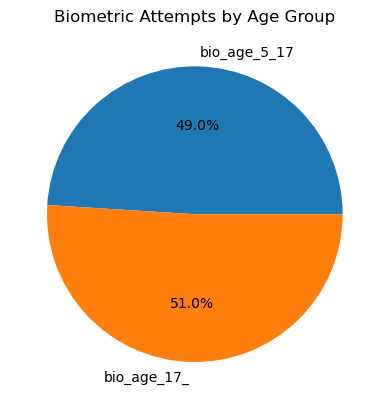

In [30]:
age_bio = df[['bio_age_5_17','bio_age_17_']].sum()

age_bio.plot(
    kind='pie',
    autopct='%1.1f%%',
    title='Biometric Attempts by Age Group'
)
plt.ylabel('')
plt.show()


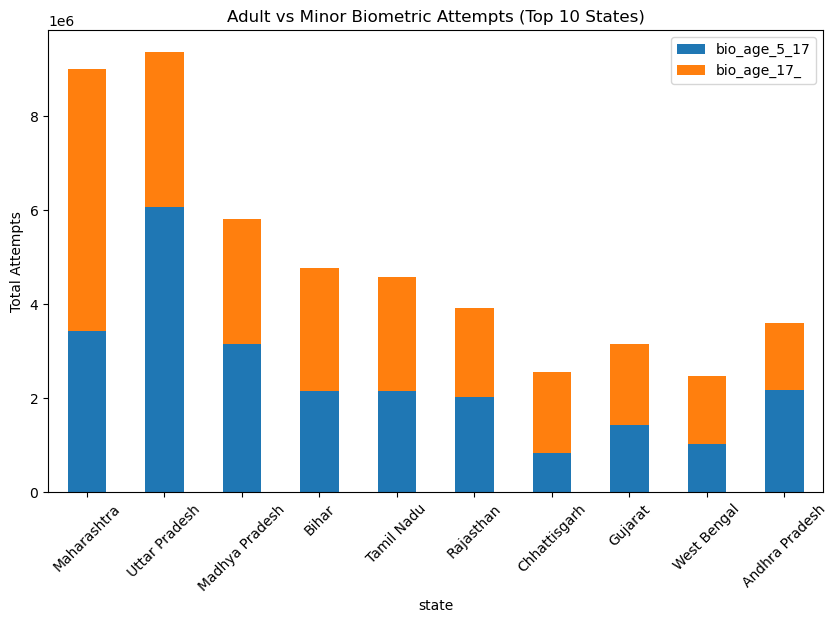

In [31]:
state_age = df.groupby('state')[['bio_age_5_17','bio_age_17_']].sum()
state_age = state_age.sort_values('bio_age_17_', ascending=False).head(10)

state_age.plot(
    kind='bar',
    stacked=True,
    figsize=(10,6)
)

plt.title('Adult vs Minor Biometric Attempts (Top 10 States)')
plt.ylabel('Total Attempts')
plt.xticks(rotation=45)
plt.show()


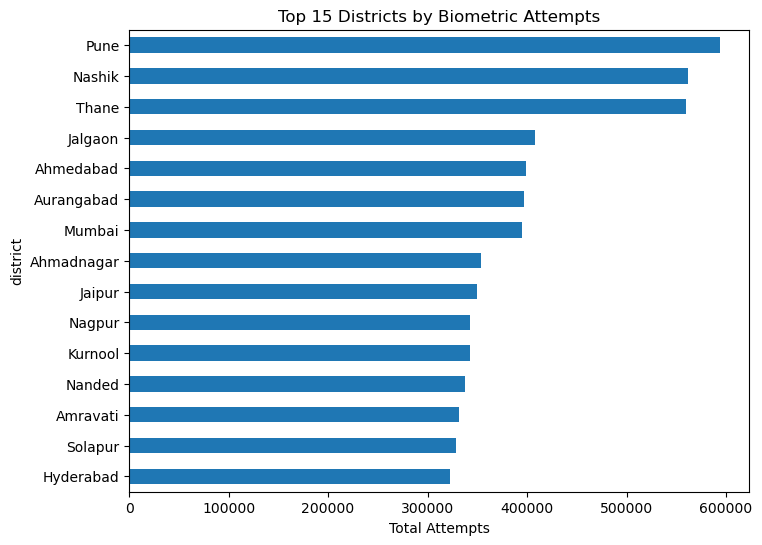

In [32]:
top_districts = (
    df.groupby('district')['total_bio_attempts']
    .sum()
    .sort_values(ascending=False)
    .head(15)
)

plt.figure(figsize=(8,6))
top_districts.plot(kind='barh')
plt.title('Top 15 Districts by Biometric Attempts')
plt.xlabel('Total Attempts')
plt.gca().invert_yaxis()
plt.show()


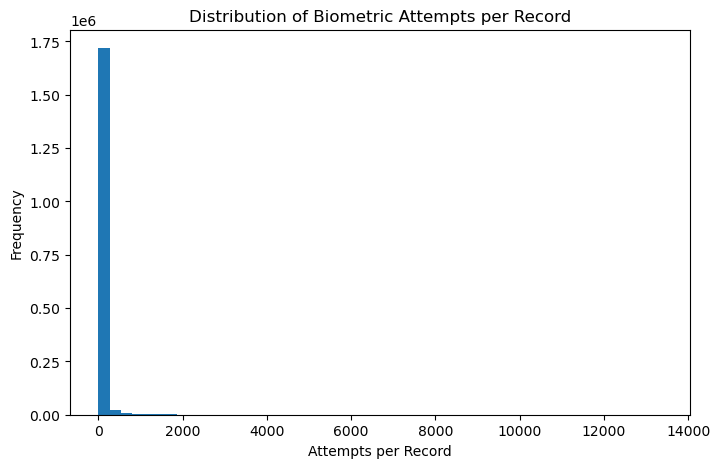

In [33]:
plt.figure(figsize=(8,5))
plt.hist(df['total_bio_attempts'], bins=50)
plt.title('Distribution of Biometric Attempts per Record')
plt.xlabel('Attempts per Record')
plt.ylabel('Frequency')
plt.show()


<Figure size 1000x500 with 0 Axes>

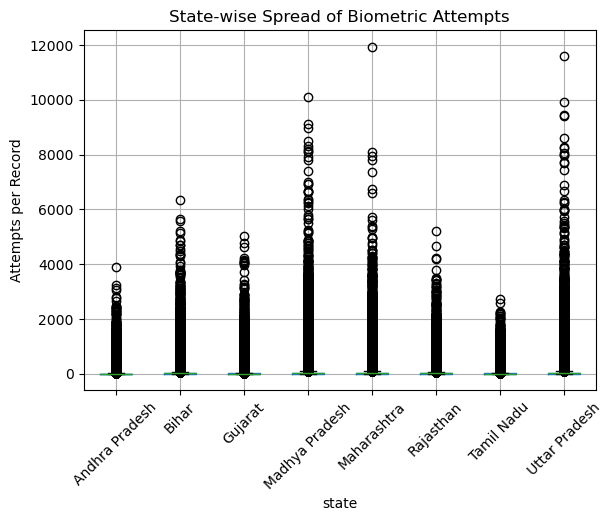

In [34]:
top_states = state_bio.head(8).index
subset = df[df['state'].isin(top_states)]

plt.figure(figsize=(10,5))
subset.boxplot(
    column='total_bio_attempts',
    by='state',
    rot=45
)
plt.title('State-wise Spread of Biometric Attempts')
plt.suptitle('')
plt.ylabel('Attempts per Record')
plt.show()


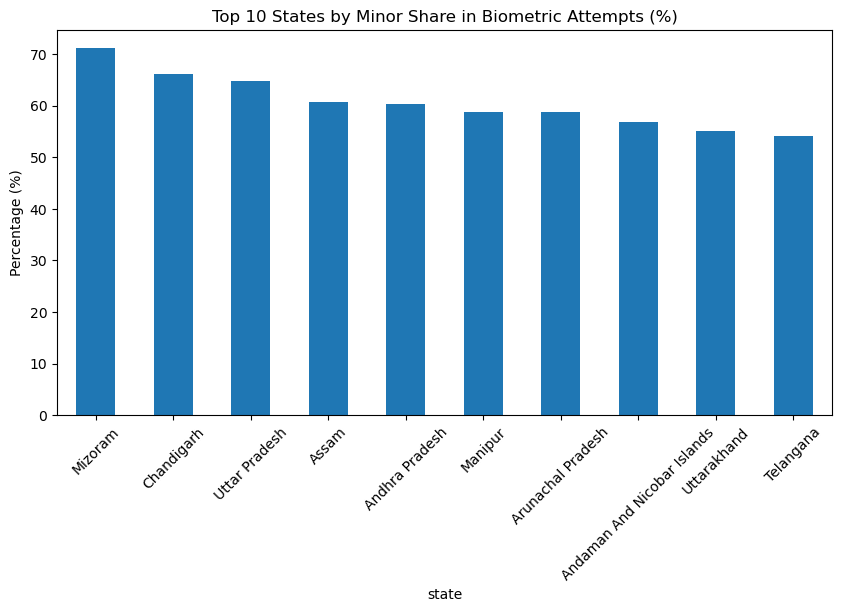

In [35]:
minor_share = (
    df.groupby('state')['bio_age_5_17'].sum() /
    df.groupby('state')['total_bio_attempts'].sum()
) * 100

minor_share = minor_share.sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
minor_share.plot(kind='bar')
plt.title('Top 10 States by Minor Share in Biometric Attempts (%)')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
plt.show()


In [36]:
df.describe()

,date,pincode,bio_age_5_17,bio_age_17_,total_bio_attempts
count,1765772,1.765772e+06,1.765772e+06,1.765772e+06,1.765772e+06
mean,2025-10-21 22:20:04.553249536,5.217571e+05,1.894495e+01,1.970914e+01,3.865409e+01
min,2025-03-01 00:00:00,1.100010e+05,0.000000e+00,0.000000e+00,0.000000e+00
25%,2025-09-17 00:00:00,3.911500e+05,1.000000e+00,1.000000e+00,3.000000e+00
50%,2025-11-03 00:00:00,5.225020e+05,4.000000e+00,4.000000e+00,8.000000e+00
75%,2025-12-04 00:00:00,6.866910e+05,1.100000e+01,1.000000e+01,2.200000e+01
max,2025-12-29 00:00:00,8.554560e+05,8.002000e+03,7.625000e+03,1.338100e+04
std,NaN,1.983480e+05,8.582681e+01,9.031620e+01,1.664657e+02


### Biometric Analysis – Key Observations

Biometric activity is unevenly distributed across states, with a small number of states
contributing a large share of total biometric attempts.
This indicates higher system usage and infrastructure demand in these regions.

Age-group analysis shows that biometric attempts are predominantly driven by the adult population (17+),
reflecting real-world service usage patterns.
Minor biometric activity forms a smaller share and is likely associated with education or guardian-driven services.

District-level analysis highlights strong concentration of biometric activity in specific districts,
suggesting localized demand and potential service bottlenecks.

Overall, biometric data reflects operational load rather than enrolment behaviour
and complements demographic and enrolment insights.


In [37]:
df.to_csv(
    "../cleaned/biometric_clean_final.csv",
    index=False
)
